In [3]:
pip install dill

In [4]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import dill
sb.set() # set the default Seaborn style for graphics

In [7]:
dill.load_session('dataFile.db')

# Cluster Results

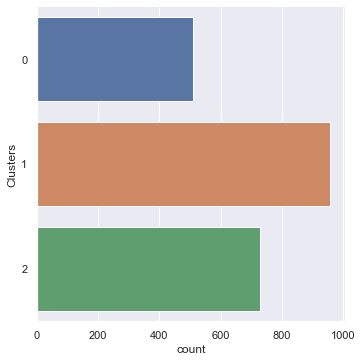

In [8]:
sb.catplot(y='Clusters', data = X_labelled, kind="count")

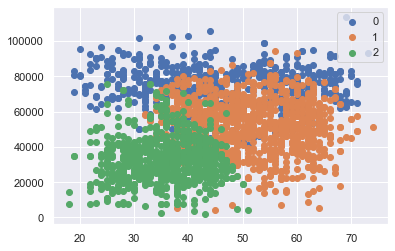

In [30]:
for i in range(3):
    filtered_label0 = X_labelled[X_labelled['Clusters'] == i]
    plt.scatter(filtered_label0.Age , filtered_label0.Income, label = i)
plt.legend(loc="upper right")
plt.show()

In [9]:
X_labelled[X_labelled["Clusters"] == 0].count()

Age         511
Income      511
Kidhome     511
Teenhome    511
Clusters    511
dtype: int64

In [32]:
X_labelled[X_labelled["Clusters"] == 1].count()

Age         958
Income      958
Kidhome     958
Teenhome    958
Clusters    958
dtype: int64

In [33]:
X_labelled[X_labelled["Clusters"] == 2].count()

Age         729
Income      729
Kidhome     729
Teenhome    729
Clusters    729
dtype: int64

### Observations

It can be seen that there all 3 clusters have significant number of data points in them. Cluster 0 has 511 data points (23.2%), Cluster 1 has 958 data points (43.6%) and Cluster 2 has 729 data points (33.2%)

Judging from the the visualisation of the clusters with just Income against Age, **all 3 clusters seem to be differentiated by income** and **2 of the clusters are differentiated by the age**.

Since our clustering is based of 4 factors, we will need to further visualise the clusters against each of the variables used for clustering to escertain how the clusters are actually differentiated with all the variables.

In [34]:
X_labelled['Clusters'] = pd.Categorical(clusters)

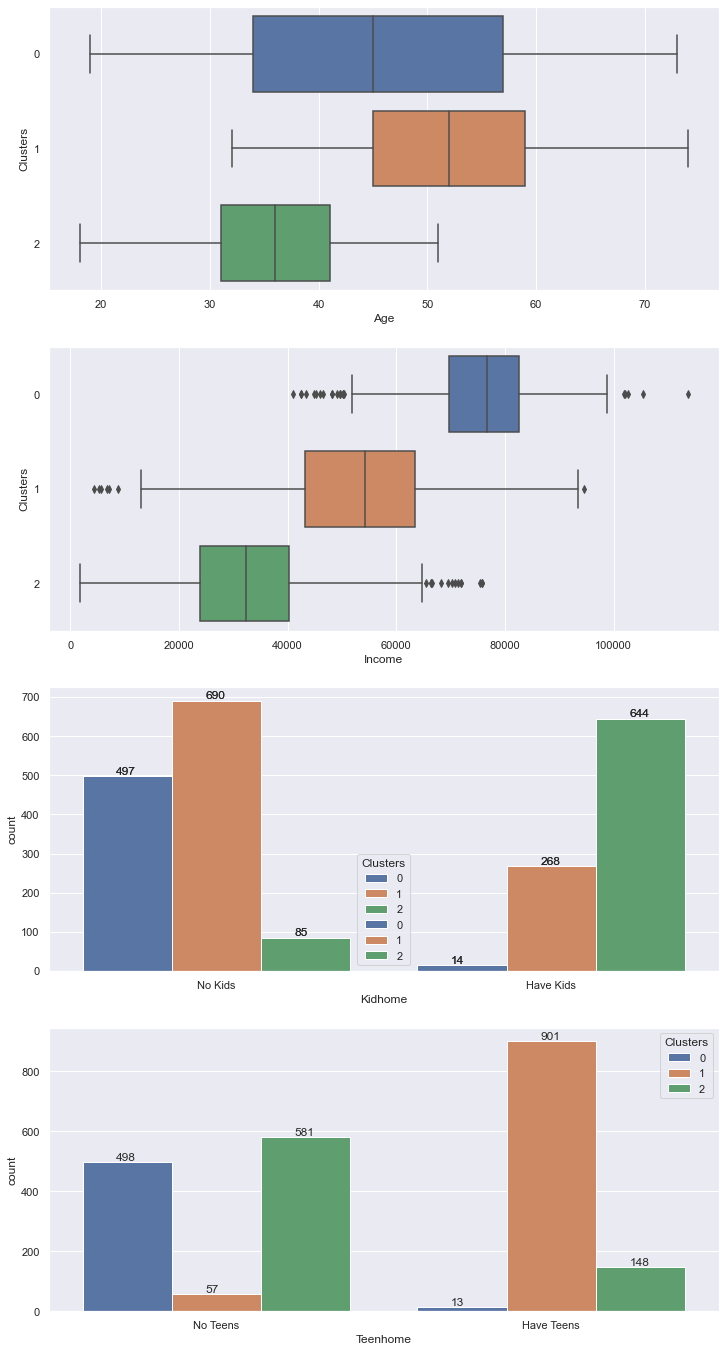

In [43]:
# Boxplots for all Features against the Clusters
f, axes = plt.subplots(4, 1, figsize=(12,24))
sb.boxplot(x = 'Age', y = 'Clusters', data = X_labelled, ax = axes[0])
sb.boxplot(x = 'Income', y = 'Clusters', data = X_labelled, ax = axes[1])

# Average Behaviour of each Cluster
    
ax = sb.countplot(x='Kidhome', hue='Clusters', data = X_labelled, ax = axes[2])
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))
        
ax = sb.countplot(x='Teenhome', hue='Clusters', data = X_labelled, ax = axes[3])
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

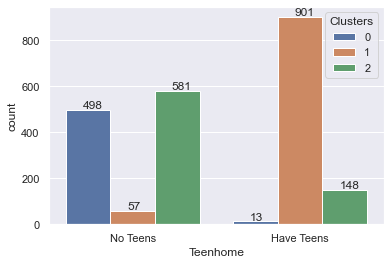

In [61]:
ax = sb.countplot(x='Teenhome', hue='Clusters', data = X_labelled)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

### Observations

<u> Cluster 0 </u> <br>
Cluster 0 contains 97.3% data points with 'No Kids' and 97.5% data points with 'No Teens'. Moreover, it also has has the highest mean income. <br>
Age does not seem to be an important factor in determining whether the customer will be clustered in 0 since all customers of different ages seem to be included in the cluster. <br>
>**Conclusion: Customers who has a higher income with 'No Teens' and 'No Kids' will most likely be clustered into cluster 0.**

<u> Cluster 1 </u> <br>
Cluster 1 contains 72.0% data points with 'No Kids' and 94.1% data points with 'Have Teens'. Moreover, only customers who are in their 30s and above are clustered here. <br>
Cluster 1 accepts customers with a wide range of income. However, since since the This shows that income do not seem to be an important factor in deciding whether it will be clustered here.
>**Conclusion: Customers who are aged 30 and above with 'No Kids' and 'Have Teens' will most likely be clustered into cluster 1**

<u> Cluster 2 </u> <br>
Cluster 2 contains 88.3% data points with 'Have Kids' and 79.7% data points with 'No Teens'. Moreover, customers in this clusters are those in their early 50s and below with a mean age of about 35. These customers generally also have a lower mean income.
>**Conclusion: Customers who are aged 50 and below with a lower income with 'No Teens' and 'Have Kids' will most likely be clustered into cluster 2**

#### From the observations above, these are the profiles of the customers in each cluster:
>**Cluster 0 are those with no children at all and are the richest (Age does not matter)<br>
>Cluster 1 are those with children (Teens) and are older with middle income<br> 
>Cluster 2 are those with children (Kids) and are younger with low income<br>**

We will now analyse the purchasing habits of each cluster which will help us identify the type of products to advertise and who to advertise them to. It will also allow us to identify the platform we should advertise on.

# Purchasing Habits of each Cluster

<AxesSubplot:xlabel='MntGoldProds', ylabel='Clusters'>

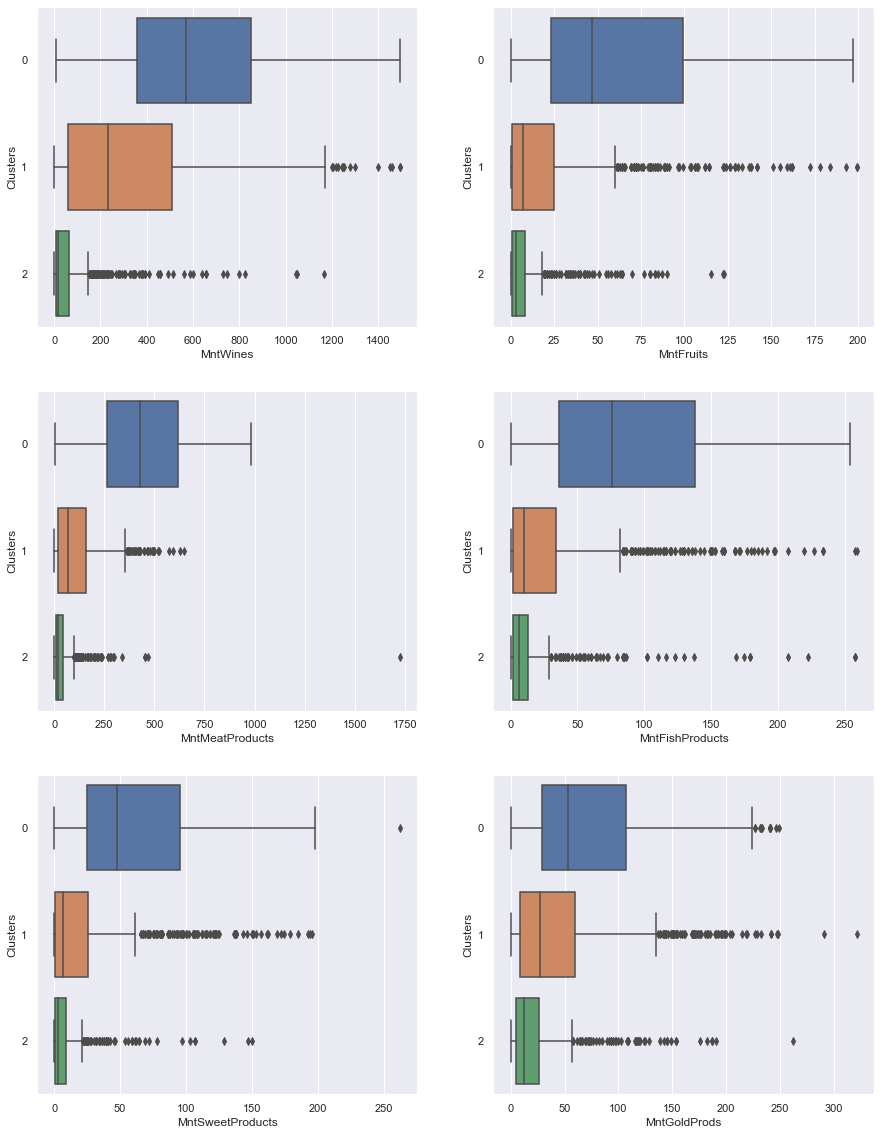

In [57]:
# Boxplot of  Education against response variables
X_data = new_df4.copy()
X_data['Clusters'] = list(clusters)

f, axes = plt.subplots(3, 2, figsize=(15, 20))
sb.boxplot(x = "MntWines", y = "Clusters", data = X_data, orient = "h", ax=axes[0][0])
sb.boxplot(x = "MntFruits", y = "Clusters", data = X_data, orient = "h", ax=axes[0][1])
sb.boxplot(x = "MntMeatProducts", y = "Clusters", data = X_data, orient = "h", ax=axes[1][0])
sb.boxplot(x = "MntFishProducts", y = "Clusters", data = X_data, orient = "h", ax=axes[1][1])
sb.boxplot(x = "MntSweetProducts", y = "Clusters", data = X_data, orient = "h", ax=axes[2][0])
sb.boxplot(x = "MntGoldProds", y = "Clusters", data = X_data, orient = "h", ax=axes[2][1])

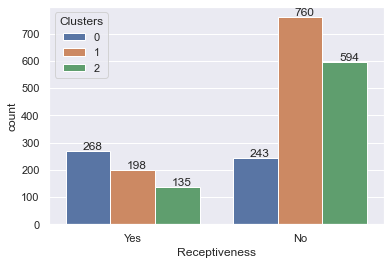

In [39]:
ax = sb.countplot(x='Receptiveness', hue='Clusters', data = X_data)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

### Observations
<u> Cluster 0 </u> <br>
Customers from this cluster tend to purchase the most amount of products in all categories. More notably, these customers are more inclined to purchase wine products (absolute mean value of almost 600) and meat products (absolute mean value of about 400) as compared to clusters 1 and 2. <br>
Moreover, people from cluster 0 tend to purchase the most on all platforms (web, catalog, physical store) as compared to clusters 1 and 2. Within the cluster itself, people from this cluster seem to purchase the most from physical stores. It is also interesting to note that even though customers in this cluster visit the online web store the least often, they are the ones who purchase the most amount of items on the web.
> **Overall Cluster 0 tend to purchase more wine and meat products and purchase more from physical stores. They also visit the web store the least often**

<u> Cluster 1 </u> <br>
Customers from this cluster tend to purchase more amount of products in all categories as compared to those in cluster 2 but less than those who are in cluster 0. It is interesting to note that this cluster has a much higher number of wine products bought.<br> 
It is also noted that these cluster purchase the most in physical stores. <br>
>**Overall Cluster 1 tend to purchase more wine products and also purchase more from physical stores.** 

<u> Cluster 2 </u> <br>
Customers from this cluster tend to purchase the least amount of products in all categories and on all platforms (web, catalog, and physical store) as compared to those in cluster 0 and cluster 1. <br> Within it's own cluster, customers tend to buy more gold products. However, since this cluster has the lowest-income, it is also important to note what they buy the most out of the necessities so that it will be more relevant for our advertisements. In this case, it can be seen from above that fish products is bought the most often out of the necessities.<br>
It is also interesting to note that while these customers tend to visit the online web store the most often, they tend to purchase the least number of products on the web store. (window-shopping)
>**Overall Cluster 2 tend to purchase more fish products out of the basic necessities and carry out window-shopping online**

<u>Receptiveness of promotions</u> <br>
From the bar chart above, it can be seen that clusters 0 are the most receptive (52%) to promotions followed by cluster 1 (21%) and cluster 2 (18%). <br> As cluster 0 is the richest followed by cluster 1 and 2, it shows a correlation between income and receptiveness which is in line with our previous conclusion made in the EDA. The conclusions drawn is hence the same:
>**People with higher income are more receptive to promotions. Therefore, advertisements for goods that are more likely to be purchased by people of higher income should include some form of promotion.**

### Connection drawn to the real-world
The observations drawn above could be due to be a number of reasons that could be explained qualitatively which could be beneficial for us to come up with a clearer marketing campaign
1. Those who have a higher income and do not have children (cluster 0) would have higher disposable income since they do not need to pay for the expenses of their children. Hence, they will more likely spend money on themselves as shown above


2. People who are younger are more likely to have a lower income since they have just entered the workforce (cluster 2). Coupled with the fact that they have kids to take care of, they would be more thrifty on their spending as reflected above. This could also be a reasons why they have a higher propensity to window-shop.


3. People who are older would tend to apreciate drinking wine more (https://www.wineintelligence.com/is-wine-losing-its-hold-on-younger-adults/). This is reflected in cluster 1 which consists of people who are older and how they buy a disproportionately larger amount of wine products as compared to other products.

# Conclusion
**From both our EDA and Clustering results, connections can be drawn which could be useful for the company to note and make sense of:**
1. It was observed that there is a bimodal distribution for 'NumWebVisitsMonth' for those with 'No Teens' in our EDA. We concluded in our EDA that maybe there was a two separate groups within the group of customers with no teens - one group tend to visit the Mall's website more often than the other. This was indeed confirmed by our clustering results in which clusters 0 and 2 both don't have teens but cluster 0 seldom visit the web store while cluster 1 visit the web store very often.


2. It was observed that people with teens at home tend to spend more on wine in our EDA. This is indeed confirmed under cluster 1 (those with teens) as this cluster buys a disproportionately larger amount of wine as compared to other products.


3. From our EDA, we considered giving priority to wine and meat products for our advertisements since there is a disproportionately higher amount of such products sold. This disproportionality can be confirmed by clusters 0 and and 1 which bought a disproportionately larger amount of wine. Cluster 0 also bought a disproportionately higher amount on meat products.


4. From our EDA, we concluded that that advertisements posted on the website should feature products that are more enticing to people with kids at home as they visited the online store most often. This is indeed confirmed by cluster 2 (with kids) which shows a bahaviour of window-shopping online.


5. from both our EDA and Clustering results, it can be seen that people with a higher income will be more receptive to advertisements. This information will be beneficial for future advertising campaigns.

**Linking back to our original 3 key questions, we came up with different options from our analysis for the marketing team to consider:**

1. Cluster 0 spends the most throughout all products, hence it makes sense to target them for our advertisements to further boost profit. As the products that they buy the most are wine and meat products, it will make sense if we advertise such products to this group of people. This is also in line with our EDA observation which shows a high correlation between 'Income' and and Wine and Meat products as cluster 0 are those of highest income. As observed above, people of this cluster also have the highest receptiveness to promotions. Hence, it will be good if promotions were included in these advertisements. Since the absolute mean value for physical store purchases is highest for this cluster, we will place these advertisements in our physical store. Moreover, since this cluster contains people of all age range, such advertisement should be design to be as generic as possible.<br><br>From our EDA, we also concluded that maybe customers who have teens would tend to spend more on wine. This is in line with our cluster results which shows that the amount of wine bought by cluster 1 (those with teens at home) is the highest out of all the products. Since this cluster has a higher propensity to buy wine, we can also target them in our wine advertisements. As this cluster are the ones of a older age, we could consider designing the advertisements to cater to them. However, from our EDA, it might also be a result of having teens who are starting to enjoy drinking too. Hence, the advertisements can also cater to them so that they can persuade their parents to buy wine for them. Since this cluster purchase the most via physical stores as well, such advertisements can be placed there. 
**Conclusion: Meat/Wine Advertisements in Physical Stores to Target Clusters 0 and 1. Promotions/Discounts should be used in these advertisements and make these advertisments as generic (cater to people of all age range) as possible.**


2. Other than targeting those that are already spending a lot, we should also consider targeting those that are looking at our products but are not buying them. Since cluster 2 has a behaviour of window-shopping online, we can consider placing online advertisements which target them. Aside from wine and meat products that are already advertised to target cluster 0 and 1, since the mean value of the amount of fish products bought is the highest for cluster 2, putting up advertisement to promote fish products would be suitable for them. As this cluster tend to be people who are from the lower-income range, are younger and have kids, including discounts in the advertisement would perhaps entice them to purchase more of the product. Even though this cluster are not really receptive to promotions as seen in above, we still decided to go ahead with discounts for fish products as it is the most effective way to advertise and increase sales of such perishables (eg. fish). Moreover, these advertisements should be designed in a way that would cater to a younger population.
**Conclusion: Fish Advertisements on the online store to target cluster 2. Promotions/Discounts should be used in these advertisements and cater them to younger people**

## Limitations

1. Ethical considerations: While a company needs to maxmimise profits, advertisements which involves sensitive/addictive products should be done in a tasteful manner and done with accordance with the law. These includes wine products in our case. Even though we identified that teens may want to consume wine as they come of age, the advertisements should not promote unhealthy consumption of wine.


2. Our conclusions are only limited to the types of products given in the dataset which might not be reflective of of all the products sold. For example, the dataset used does not contain any products that are more likely to be bought by parents (eg. diapers). Hence, the actual purchasing habit might not be reflected in our analysis. For example, people from cluster 2 could be spending a lot of money on milk powder but since this is not reflected in the dataset, we could be missing out on a large oppotunity to advertise such products to them.

## Back on top!

After looking at the proposal given by the marketing team, the boss was impressed and gave the green-light for the advertisements

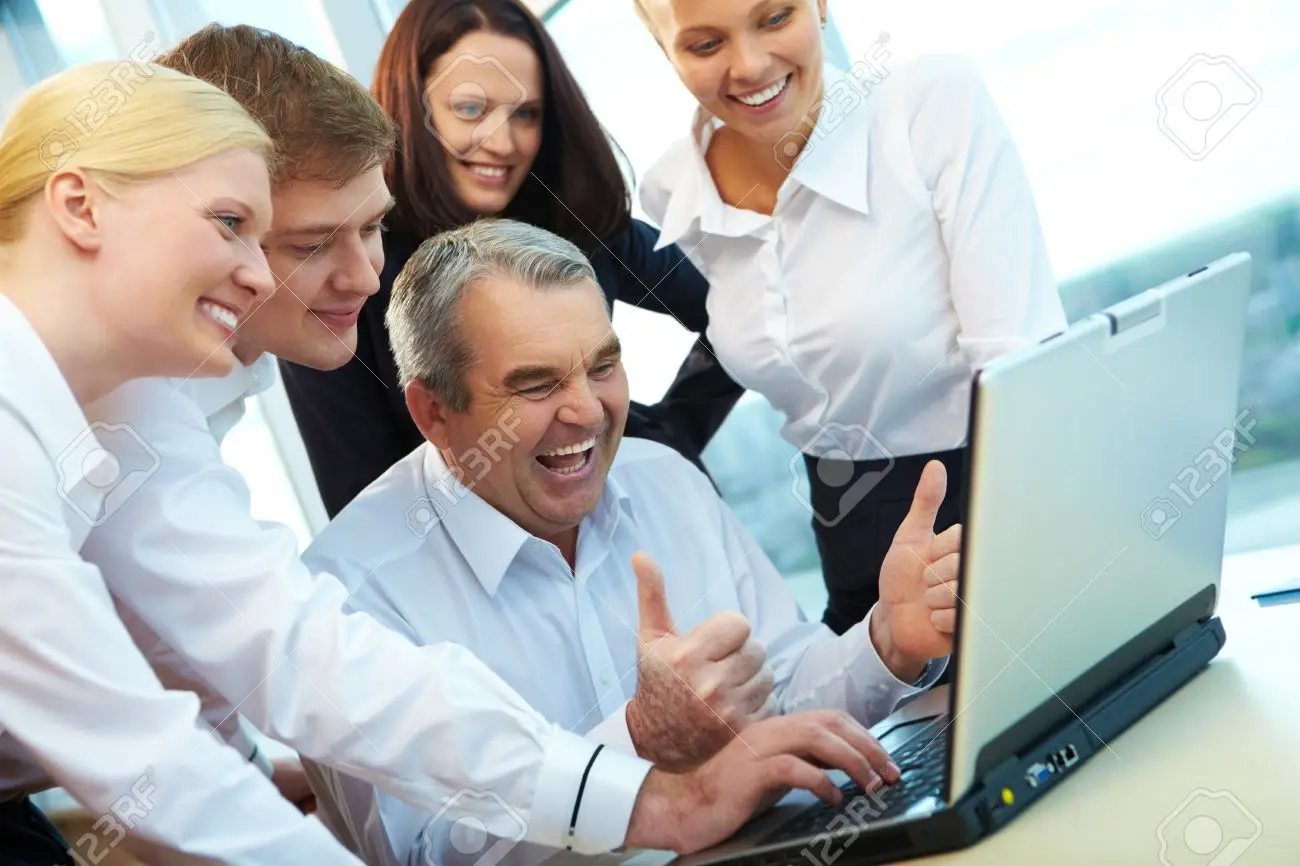

After the advertisements have been put up, sales started to boom and Mall X started climbing up the ranks again! Within only a month, Mall X overtook Mall Y to reclaim it's title as the top earning shopping mall in Singapore!

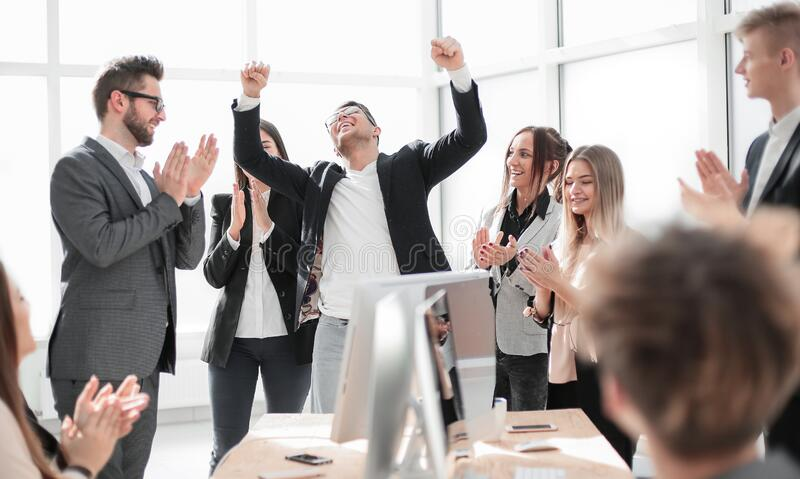

The boss was so happy that he decided to give the smart kid in the marketing team a promotion!

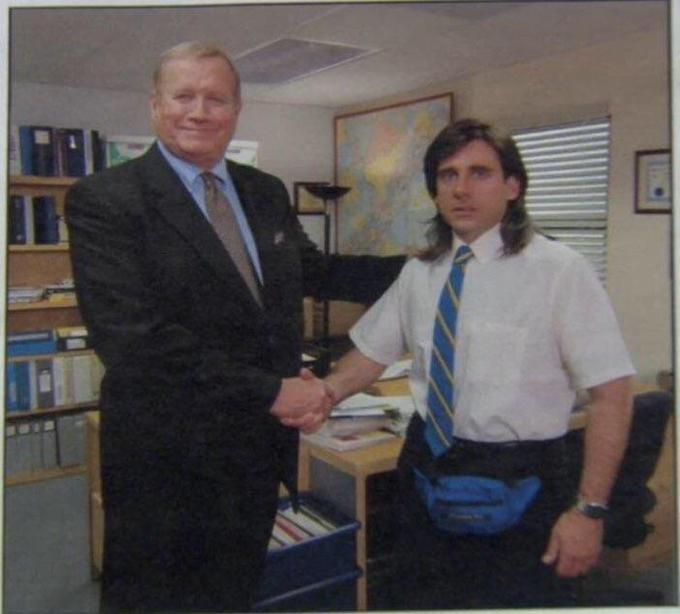

# The End